In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from numpy import array as Ar

%matplotlib inline


### Initiate field

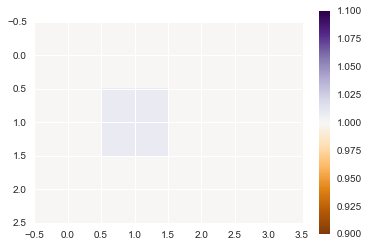

In [2]:
dims = (3,4)
field = np.ones(dims)
field[1,1] = np.nan
plt.imshow(field,interpolation='nearest',cmap='PuOr')
plt.colorbar()

### Initiate parameters

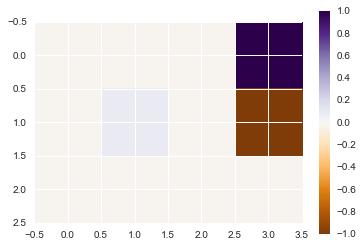

In [33]:
# all possible states (= all coordinates except for (1,1))
S = [(x,y) for x in range(dims[0]) for y in range(dims[1]) if not field[(x,y)]==np.nan]

# all possible actions (= (E,W,S,N)) (arrays 'cause will only be needed for addition)
A = [[0,1],[0,-1],[1,0],[-1,0]]
A = [Ar(x) for x in A]

# probabilities (here all equal)
Psa = Ar([0.25]*4)

# cost of step
g = 0.9

# reward function: everywhere = 0.02, win = 1, loose = -1
R = deepcopy(field)*(-0.02)
R[0,3] = 1
R[1,3] = -1

plt.imshow(R,interpolation='nearest',cmap='PuOr')
plt.colorbar()

### Initiate value function (0 everywhere)

In [40]:
def get_Psa(s,a): #here pretty easy: states not probabilistic
    s_prime = bounce_border(s+a)
    Psa = np.zeros(dims)
    Psa[s_prime]=1
    return Psa

def get_reward_for_best_action(s,A,V_est):
    future_reward = []
    for a in A:
        Psa = get_Psa(s,a)
        future_reward.append(np.nansum(Psa*V_est))
    #which action maximises future reward?
    best_action = np.where(future_reward==max(future_reward))[0]
    #if multiple lead to same result: random choice
    if len(best_action)>1:
        best_action = np.random.choice(best_action)
    return future_reward[int(best_action)]
   

In [41]:
V_est = np.zeros([3,4])
for iteration in range(100):
    # get new value for each state
    V_new = np.zeros([3,4])
    for s in S:
        max_a = get_reward_for_best_action(s,A,V_est)
        V_new[s] = R[s]+g*max_a
    V_est = deepcopy(V_new)
    V_est[0,3] = 1
    V_est[1,3] = -1


In [42]:
V_est

array([[ 0.6748  ,  0.772   ,  0.88    ,  1.      ],
       [ 0.58732 ,       nan,  0.772   , -1.      ],
       [ 0.508588,  0.58732 ,  0.6748  ,  0.58732 ]])

### Define function to get all possible actions given a state

In [43]:
def bounce_border(s):
    s[0] = max(0,s[0])
    s[0] = min(2,s[0])
    s[1] = max(0,s[1])
    s[1] = min(3,s[1])
    return tuple(s)


asdfk;lj

In [45]:
V_est = np.zeros([3,4])
for iteration in range(1000):
    # get new value for each state
    V_new = np.zeros([3,4])
    for s in S:
        # for each state: what is the optimal action?
        max_a = get_summed_value(s,V_est)
        V_new[s] = R[s]+g*max_a
    V_est = deepcopy(V_new)
    V_est[0,3] = 1
    V_est[1,3] = -1


In [47]:
V_est

array([[-0.06728169,  0.00908854,  0.18747556,  1.        ],
       [-0.08466601,         nan, -0.27445052, -1.        ],
       [-0.13545678, -0.15756167, -0.31836674, -0.57569549]])

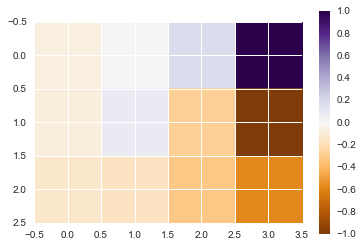

In [46]:
plt.imshow(V_est,interpolation='nearest',cmap='PuOr')
plt.colorbar()